## K-NN을 이용한 도미와 빙어 분류 모델 - 훈련 데이터 세트와 테스트 데이터 세트 분리

### 입력 데이터, 정답 데이터 numpy 배열로 변환하기 

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr.shape)
print(input_arr)
print('_____________________________________________________________________________')
print(target_arr.shape)
print(target_arr)

(49, 2)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
_____________________________________________________________________________
(49,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0

### 랜덤으로 훈련 데이터 세트와 테스트 데이터 세트 나누기 

- 0부터 48까지 인덱스를 랜덤하게 섞기

In [15]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


- 훈련 데이터 세트, 테스트 데이터 세트 나누기

훈련 데이터 세트는 35개, 테스트 데이터 세트는 14개

In [17]:
train_input = input_arr[index[: 35]]
train_target = target_arr[index[: 35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(35, 2)
(35,)
(14, 2)
(14,)


### 훈련 데이터 세트, 테스트 데이터 세트 분포 확인하기

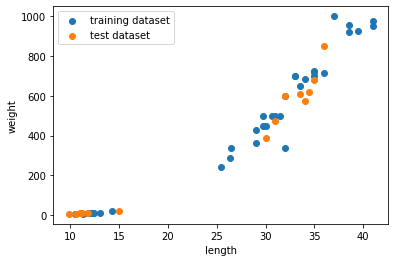

In [20]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(('training dataset', 'test dataset'))
plt.show()

- 훈련 데이터 세트와 테스트 데이터 세트 양쪽 모두에 도미와 빙어가 모두 섞여 있다. 

### 모델 훈련하고 평가하기

In [22]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

- 100%의 정확도로 테스트 세트에 있는 모든 생선을 맞혔다.

### 모델을 이용하여 테스트 데이터 예측하기

- 테스트 데이터 세트의 입력을 모델에 넣었을 때 모델이 예측하는 값

In [23]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 테스트 데이터 세트의 실제 정답 값

In [24]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 테스트 데이터의 입력에 대한 예측 결과가 정답과 모두 일치한다. 

